# Template Matching: OpenCV

Template matching is a computer vision technique used to find a subimage (template) within a larger image. It works by comparing a template image against a target image and identifying regions in the target image where the template closely matches. Template matching is often used for object detection, pattern recognition, and image analysis tasks. Here's how it works:

1. **Template Image**: You start with a smaller image called the "template" that you want to find in a larger image (the "target" or "source" image). The template represents the object or pattern you're looking for.

2. **Sliding Window**: The template is systematically compared to different regions of the target image. This is typically done by moving a "sliding window" (which is the same size as the template) across the target image.

3. **Comparison**: At each position of the sliding window, a similarity metric or matching score is calculated to measure how well the template matches the region of the target image. Common similarity metrics include mean squared error, cross-correlation, or normalized cross-correlation.

4. **Matching Score Map**: As the sliding window moves across the target image, the similarity scores are recorded. This forms a "matching score map" or "correlation map," where each point corresponds to the similarity score at a specific position.

5. **Thresholding**: To locate the best matches, you can apply a threshold to the matching score map. High similarity scores indicate regions where the template closely matches the target image.

6. **Localization**: The positions in the matching score map that exceed the threshold represent the locations where the template is found in the target image. These positions can be used to localize and mark the detected objects or patterns.

Template matching has some limitations. It can be sensitive to changes in scale, rotation, and lighting conditions. Variations in size, orientation, and illumination of the template in the target image can affect the matching results. To address these limitations, more advanced techniques like feature-based object detection (using methods like SIFT, SURF, or deep learning-based approaches) are often used in practical applications for better robustness and accuracy.

Here's an example of template matching implementation in OpenCV using Python:

```python
import cv2
import numpy as np

# Load the target image (the larger image where you want to find the template)
target_image = cv2.imread('target_image.jpg')

# Load the template image (the smaller image you want to find in the target)
template = cv2.imread('template.jpg')

# Perform template matching using the cv2.matchTemplate() function
result = cv2.matchTemplate(target_image, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold to find matching locations
threshold = 0.8

# Find locations where the template matches the target image above the threshold
locations = np.where(result >= threshold)

# Iterate over the matching locations and draw rectangles around them on a copy of the target image
for pt in zip(*locations[::-1]):
    cv2.rectangle(target_image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

# Display the target image with matching rectangles
cv2.imshow('Template Matching Result', target_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this code:

1. We load both the target image and the template image using `cv2.imread()`. Make sure to replace `'target_image.jpg'` and `'template.jpg'` with the actual file paths of your images.

2. We perform template matching using the `cv2.matchTemplate()` function, which compares the template with the target image using the specified method (`cv2.TM_CCOEFF_NORMED` in this case). This method returns a similarity map.

3. We specify a threshold value (`0.8` in this example) to determine which matches to consider. You can adjust this threshold based on your needs and the nature of your images.

4. We use `np.where()` to find the locations where the similarity score is above the threshold.

5. We iterate over the matching locations and draw rectangles around them on a copy of the target image using `cv2.rectangle()`.

6. Finally, we display the target image with the matching rectangles using `cv2.imshow()`.

This code will highlight the regions in the target image where the template matches, making it easier to identify and locate instances of the template within the larger image.

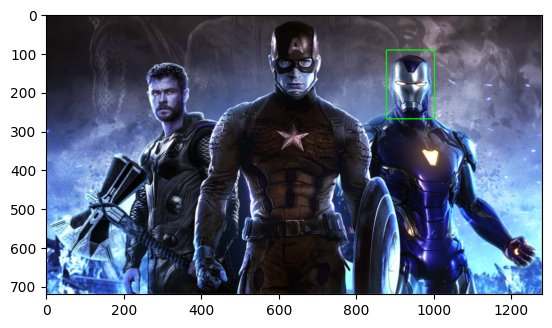

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the target image (the larger image where you want to find the template)
target_image = cv2.imread('Images/avengers.jpg')
target_image = cv2.resize(target_image, (0, 0), fx=0.5, fy=0.5)
# Load the template image (the smaller image you want to find in the target)
template = cv2.imread('Images/temp.jpg')
template = cv2.resize(template, (0, 0), fx=0.5, fy=0.5)
# Perform template matching using the cv2.matchTemplate() function
result = cv2.matchTemplate(target_image, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold to find matching locations
threshold = 0.99

# Find locations where the template matches the target image above the threshold
locations = np.where(result >= threshold)

# Iterate over the matching locations and draw rectangles around them on a copy of the target image
for pt in zip(*locations[::-1]):
    cv2.rectangle(target_image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

# Display the target image with matching rectangles
#cv2.imshow('Template Matching Result', target_image)
plt.imshow(target_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


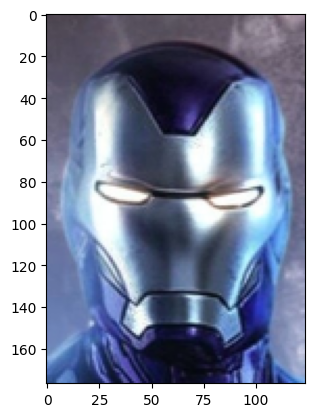

In [4]:
plt.imshow(template)

OpenCV provides several methods for template matching, each with its own characteristics and use cases. Here are some commonly used template matching methods available in OpenCV:

1. **cv2.TM_CCOEFF**: Correlation coefficient-based method. It correlates the template and target images.

2. **cv2.TM_CCOEFF_NORMED**: Normalized correlation coefficient-based method. It normalizes the result to be in the range [-1, 1].

3. **cv2.TM_CCORR**: Cross-correlation-based method. It computes the cross-correlation between the template and target images.

4. **cv2.TM_CCORR_NORMED**: Normalized cross-correlation-based method. It normalizes the result to be in the range [0, 1].

5. **cv2.TM_SQDIFF**: Squared difference-based method. It computes the sum of squared differences between the template and target images.

6. **cv2.TM_SQDIFF_NORMED**: Normalized squared difference-based method. It normalizes the result to be in the range [0, 1].

Each of these methods has its own characteristics, and the choice of method depends on the specific application and the nature of the images you are working with. Here's how to use each method:

```python
# Example of using the cv2.matchTemplate() function with different methods
result_ccoeff = cv2.matchTemplate(target_image, template, cv2.TM_CCOEFF)
result_ccoeff_normed = cv2.matchTemplate(target_image, template, cv2.TM_CCOEFF_NORMED)
result_ccorr = cv2.matchTemplate(target_image, template, cv2.TM_CCORR)
result_ccorr_normed = cv2.matchTemplate(target_image, template, cv2.TM_CCORR_NORMED)
result_sqdiff = cv2.matchTemplate(target_image, template, cv2.TM_SQDIFF)
result_sqdiff_normed = cv2.matchTemplate(target_image, template, cv2.TM_SQDIFF_NORMED)
```

After applying the desired method, you can proceed to find the locations where the template matches and draw rectangles or take further action based on your specific application, as demonstrated in the previous example. The choice of method depends on factors such as image noise, scaling, and the type of objects or patterns you are trying to detect in the target image. Experimentation may be necessary to determine which method works best for your use case.